/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN:
Mean Absolute Error: 109.2
Mean Squared Error: 22162.8
R^2 Score: 0.7512995579420001

Linear Regression:
Mean Absolute Error: 127.47612319759105
Mean Squared Error: 23585.14559958994
R^2 Score: 0.7353386694542067

Logistic Regression (Tier Prediction):
Accuracy Score: 0.6

XGBoost:
Mean Absolute Error: 82.94276313781738
Mean Squared Error: 18999.839795213593
R^2 Score: 0.7867927989197756
Random Forest Regression:
Mean Absolute Error: 83.73994790626041
Mean Squared Error: 15562.000971615034
R^2 Score: 0.8253705975351633

Predicted Price (KNN): $695.00
Predicted Price (Linear Regression): $538.89
Predicted Tier (Logistic Regression): 1
Predicted Price (XGBoost): $626.36
Predicted Price (Random Forest): $598.68


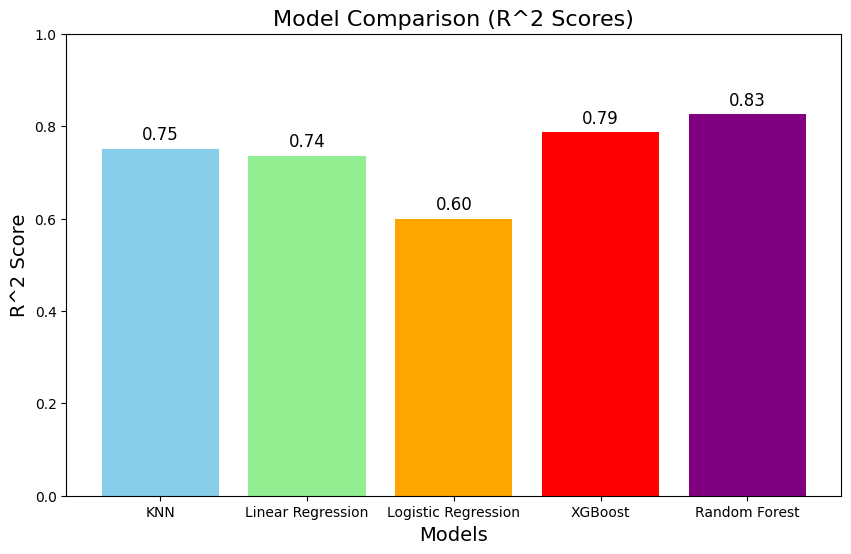

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# Data Preprocessing (reuse from your existing code)
data = pd.read_csv('Mobile phone price.csv')
data.columns = data.columns.str.strip()
data['Price ($)'] = pd.to_numeric(data['Price ($)'], errors='coerce')
data['RAM'] = data['RAM'].str.extract(r'(\d+)').astype(float)
data['Storage'] = data['Storage'].str.extract(r'(\d+)').astype(float)
data['Screen Size (inches)'] = pd.to_numeric(data['Screen Size (inches)'], errors='coerce')
data['Battery Capacity (mAh)'] = pd.to_numeric(data['Battery Capacity (mAh)'], errors='coerce')
data.dropna(subset=['Price ($)', 'RAM', 'Storage', 'Screen Size (inches)', 'Battery Capacity (mAh)'], inplace=True)

X = data[['RAM', 'Storage', 'Screen Size (inches)', 'Battery Capacity (mAh)']]
y = data['Price ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store R^2 scores for each model
model_scores = {}

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_r2 = r2_score(y_test, knn_pred)
model_scores['KNN'] = knn_r2

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)
model_scores['Linear Regression'] = lr_r2

# Logistic Regression (for classification-like price tiers, not ideal for regression tasks)
# Example: Classify prices into bins (tiers)
data['Price_Tier'] = pd.qcut(data['Price ($)'], q=4, labels=[0, 1, 2, 3])  # Create 4 tiers
y_tier = data['Price_Tier']
X_train_tier, X_test_tier, y_train_tier, y_test_tier = train_test_split(X, y_tier, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tier, y_train_tier)
log_pred = log_model.predict(X_test_tier)
log_accuracy = log_model.score(X_test_tier, y_test_tier)
model_scores['Logistic Regression'] = log_accuracy

# XGBoost
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_pred)
model_scores['XGBoost'] = xgb_r2

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
model_scores['Random Forest'] = rf_r2

# Print metrics for all models
print("KNN:")
print('Mean Absolute Error:', mean_absolute_error(y_test, knn_pred))
print('Mean Squared Error:', mean_squared_error(y_test, knn_pred))
print('R^2 Score:', knn_r2)

print("\nLinear Regression:")
print('Mean Absolute Error:', mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error:', mean_squared_error(y_test, lr_pred))
print('R^2 Score:', lr_r2)

print("\nLogistic Regression (Tier Prediction):")
print('Accuracy Score:', log_accuracy)

print("\nXGBoost:")
print('Mean Absolute Error:', mean_absolute_error(y_test, xgb_pred))
print('Mean Squared Error:', mean_squared_error(y_test, xgb_pred))
print('R^2 Score:', xgb_r2)

print("Random Forest Regression:")
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('R^2 Score:', rf_r2)

# Predict price for the example phone with each model
example = {'RAM': 8, 'Storage': 128, 'Screen Size (inches)': 6.5, 'Battery Capacity (mAh)': 4500}
example_df = pd.DataFrame([example])

print(f"\nPredicted Price (KNN): ${knn_model.predict(example_df)[0]:.2f}")
print(f"Predicted Price (Linear Regression): ${lr_model.predict(example_df)[0]:.2f}")
print(f"Predicted Tier (Logistic Regression): {log_model.predict(example_df)[0]}")
print(f"Predicted Price (XGBoost): ${xgb_model.predict(example_df)[0]:.2f}")
print(f"Predicted Price (Random Forest): ${rf_model.predict(example_df)[0]:.2f}")

# Bar Plot to Compare R^2 Scores (Accuracy) of all models
plt.figure(figsize=(10, 6))
plt.bar(model_scores.keys(), model_scores.values(), color=['skyblue', 'lightgreen', 'orange', 'red', 'purple'])
plt.title("Model Comparison (R^2 Scores)", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("R^2 Score", fontsize=14)
plt.ylim(0, 1)  # Since R^2 scores range from 0 to 1
for i, v in enumerate(model_scores.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
plt.show()


KNN R^2 Score: 0.7512995579420001


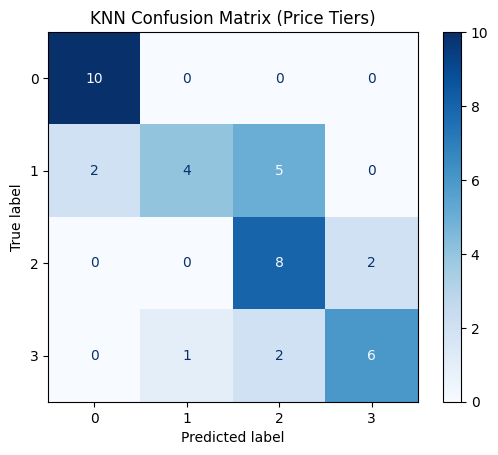

Confusion Matrix for KNN:
 [[10  0  0  0]
 [ 2  4  5  0]
 [ 0  0  8  2]
 [ 0  1  2  6]]


In [18]:
print("KNN R^2 Score:", knn_r2)

# Create price tiers for confusion matrix (same as before)
# Define price tiers (example bins, adjust based on your data's price distribution)
price_bins = [0, 250, 500, 750, float('inf')]  # You can adjust these ranges
price_labels = [0, 1, 2, 3]  # Corresponding labels for the bins

# Convert actual and predicted prices into tiers
y_test_tiers = pd.cut(y_test, bins=price_bins, labels=price_labels, right=False)
knn_pred_tiers = pd.cut(knn_pred, bins=price_bins, labels=price_labels, right=False)

# Confusion Matrix for KNN
knn_cm = confusion_matrix(y_test_tiers, knn_pred_tiers)
cm_display = ConfusionMatrixDisplay(knn_cm, display_labels=price_labels)
cm_display.plot(cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix (Price Tiers)")
plt.show()

# Optionally, print confusion matrix as text
print("Confusion Matrix for KNN:\n", knn_cm)

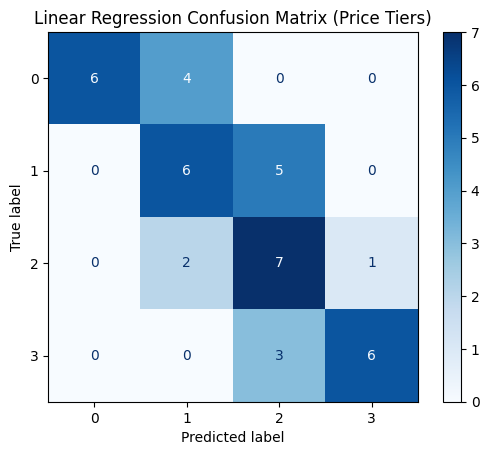

Confusion Matrix for Linear Regression:
 [[6 4 0 0]
 [0 6 5 0]
 [0 2 7 1]
 [0 0 3 6]]


In [19]:
price_bins = [0, 250, 500, 750, float('inf')]  # You can adjust these ranges
price_labels = [0, 1, 2, 3]  # Corresponding labels for the bins

# Convert actual and predicted prices into tiers
y_test_tiers = pd.cut(y_test, bins=price_bins, labels=price_labels, right=False)
lr_pred_tiers = pd.cut(lr_pred, bins=price_bins, labels=price_labels, right=False)

# Confusion Matrix for Linear Regression
lr_cm = confusion_matrix(y_test_tiers, lr_pred_tiers)
cm_display = ConfusionMatrixDisplay(lr_cm, display_labels=price_labels)
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Linear Regression Confusion Matrix (Price Tiers)")
plt.show()

# Optionally, print confusion matrix as text
print("Confusion Matrix for Linear Regression:\n", lr_cm)

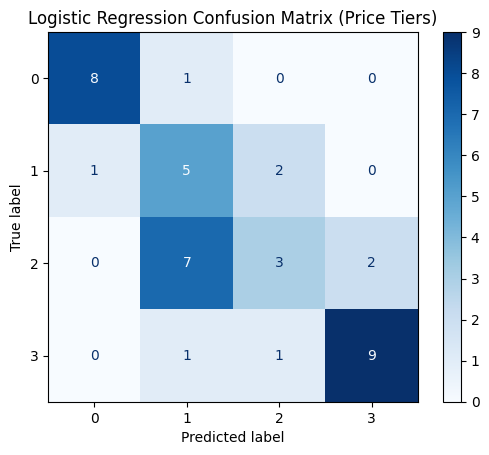

Confusion Matrix for Logistic Regression:
 [[8 1 0 0]
 [1 5 2 0]
 [0 7 3 2]
 [0 1 1 9]]


In [20]:
log_cm = confusion_matrix(y_test_tier, log_pred)
cm_display = ConfusionMatrixDisplay(log_cm, display_labels=[0, 1, 2, 3])
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix (Price Tiers)")
plt.show()

# Optionally, print confusion matrix as text
print("Confusion Matrix for Logistic Regression:\n", log_cm)

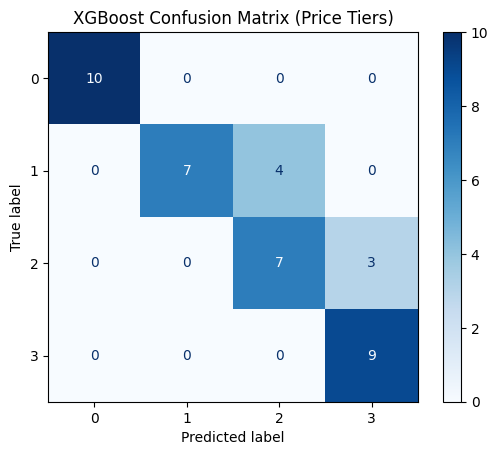

Confusion Matrix for XGBoost:
 [[10  0  0  0]
 [ 0  7  4  0]
 [ 0  0  7  3]
 [ 0  0  0  9]]


In [24]:
price_bins = [0, 250, 500, 750, float('inf')]  # Adjust bins based on your data
price_labels = [0, 1, 2, 3]  # Price tiers

# Convert actual and predicted prices into price tiers
y_test_tiers = pd.cut(y_test, bins=price_bins, labels=price_labels, right=False)
xgb_pred_tiers = pd.cut(xgb_pred, bins=price_bins, labels=price_labels, right=False)

# Confusion Matrix for XGBoost
xgb_cm = confusion_matrix(y_test_tiers, xgb_pred_tiers)
cm_display = ConfusionMatrixDisplay(xgb_cm, display_labels=price_labels)
cm_display.plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix (Price Tiers)")
plt.show()

# Optionally, print confusion matrix as text
print("Confusion Matrix for XGBoost:\n", xgb_cm)

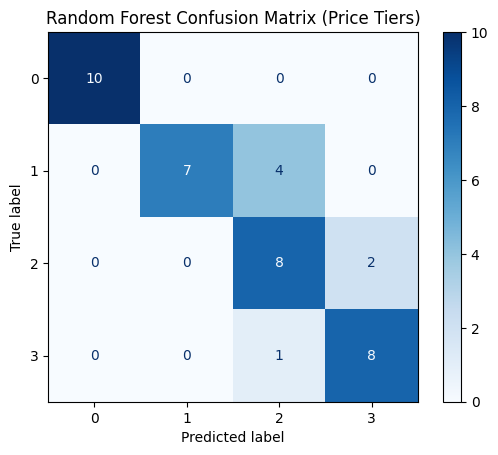

Confusion Matrix for Random Forest:
 [[10  0  0  0]
 [ 0  7  4  0]
 [ 0  0  8  2]
 [ 0  0  1  8]]


In [25]:
price_bins = [0, 250, 500, 750, float('inf')]  # Adjust bins based on your data
price_labels = [0, 1, 2, 3]  # Price tiers

# Convert actual and predicted prices into price tiers
y_test_tiers = pd.cut(y_test, bins=price_bins, labels=price_labels, right=False)
rf_pred_tiers = pd.cut(rf_pred, bins=price_bins, labels=price_labels, right=False)

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test_tiers, rf_pred_tiers)
cm_display = ConfusionMatrixDisplay(rf_cm, display_labels=price_labels)
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix (Price Tiers)")
plt.show()

# Optionally, print confusion matrix as text
print("Confusion Matrix for Random Forest:\n", rf_cm)